In [1]:
# Load data into sepholia testnet

In [2]:
from web3 import Web3
import time

# Connect to Sepolia Testnet
w3 = Web3(Web3.HTTPProvider('https://sepolia.infura.io/v3/5cc87c4ca10d4b03946303cbf55a1583'))

# Ensure connection is established
assert w3.is_connected(), "Failed to connect to Ethereum network"

# Your account details
your_account_address = '0x2137c263AA1eBc16E6A820DC988c494a8b249696'
your_private_key = 'e9436af72032b537cfd6d245d1ff13470eeae9c5fe46a1ca2d99226f0807190f'

# Contract details
contract_address = '0x079d08d489A10F07F43DF6F2c1B9069FA110cF96'
contract_abi = '[ { "inputs": [ { "internalType": "string", "name": "_ehrCID", "type": "string" } ], "stateMutability": "nonpayable", "type": "constructor" }, { "inputs": [ { "internalType": "address", "name": "viewer", "type": "address" } ], "name": "grantPermission", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "address", "name": "viewer", "type": "address" } ], "name": "rescindPermission", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [], "name": "viewInformation", "outputs": [ { "internalType": "string", "name": "", "type": "string" } ], "stateMutability": "view", "type": "function" } ]'

# Initialize the contract
contract = w3.eth.contract(address=contract_address, abi=contract_abi)



In [3]:
# Function to call viewInformation
def call_view_information():
    start_time = time.time()
    # Call the view function directly
    info = contract.functions.viewInformation().call({'from': your_account_address})
    end_time = time.time()

    return info, end_time - start_time

CID,t_time=call_view_information()

In [4]:
CID

'QmZwxyehvyTpSB44ZnKXQCt7yzwZnUeR1e7upfrp2oAVwL'

In [5]:
import pandas as pd
from cryptography.fernet import Fernet

# Specify the path to your CSV file
csv_file_path = 'ID_Encryption_CID.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)


In [6]:
def convert_key(key_str):
    # Remove the leading "b'" and trailing "'"
    key_clean = key_str[2:-1]
    # Convert to bytes
    return key_clean.encode()


In [7]:
def convert_key(key_str):
    # Remove the leading "b'" and trailing "'"
    key_clean = key_str[2:-1]
    # Convert to bytes
    return key_clean.encode()


In [8]:
import subprocess

def get_ipfs_content(cid):
    """Retrieve content from IPFS using CID and return it as a string."""
    try:
        # Execute the 'ipfs cat' command and capture its output
        result = subprocess.run(['ipfs', 'cat', cid], capture_output=True, text=True, check=True)
        return result.stdout
    except subprocess.CalledProcessError as e:
        return f"An error occurred: {e}"

# Replace this with your CID
cid = CID

# Get content and print it
content = get_ipfs_content(cid)


In [9]:
key=convert_key(df['Encryption_Key'].iloc[1])

In [10]:
encrypt_list=(content.split('\n'))

In [11]:
encrypt_list=encrypt_list[:len(encrypt_list)-1]

In [12]:
cipher_suite = Fernet(key)
decrypted_lines = []
for line in encrypt_list:
    decrypted_lines.append((cipher_suite.decrypt(line.strip())).decode('utf-8'))

In [13]:
from io import StringIO

# Your data
data=decrypted_lines
# Convert the list of strings into a single string
data_str = '\n'.join(data)

# Use StringIO to create a file-like object
data_io = StringIO(data_str)

# Use pandas to read the CSV data
df = pd.read_csv(data_io)

In [14]:
df

,Id,FIRST,LAST,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,DESCRIPTION,Insurance_name,Insurance_ownership,Provider Name,SPECIALITY
0,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,1989-01-21T11:42:25Z,1989-01-21T12:38:03Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
1,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2002-02-09T11:42:25Z,2002-02-09T12:25:38Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
2,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2004-02-21T11:42:25Z,2004-02-21T12:28:08Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
3,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2007-03-10T11:42:25Z,2007-03-10T12:20:01Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
4,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2012-04-07T11:42:25Z,2012-04-07T12:30:59Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
5,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2013-04-13T11:42:25Z,2013-04-13T12:36:01Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
6,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2014-04-19T11:42:25Z,2014-04-19T12:38:27Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
7,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2015-04-25T11:42:25Z,2015-04-25T12:38:53Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
8,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2016-04-30T11:42:25Z,2016-04-30T12:27:24Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE
9,aab88605-4d68-76cc-707d-adf93b21a016,Sherwood961,Nolan344,58844.32,2017-05-06T11:42:25Z,2017-05-06T12:17:05Z,aab88605-4d68-76cc-707d-adf93b21a016,83445caa-116b-3a1e-a75e-8104d321c4c3,a398f5b4-e528-371b-9d42-c9a811ce7007,b046940f-1664-3047-bca7-dfa76be352a4,General examination of patient (procedure),Blue Cross Blue Shield,PRIVATE,Peter292 Crona259,GENERAL PRACTICE


In [15]:
#Testing Transction time for permission
addPermission = []
revokePermission = []

In [16]:
# Lists to store results
test_address= '0x5FE44Dd7F4167ECA22fB667f8dB3FD0C18C25Cd8'


## Function to perform a transaction
def perform_transaction(function_name, params):
    # Get the current nonce
    nonce = w3.eth.get_transaction_count(your_account_address)

    # Create the transaction data
    transaction_data = contract.encodeABI(
        fn_name=function_name,
        args=params
    )

    # Create the transaction dictionary
    transaction = {
        'from': your_account_address,
        'to': contract_address,
        'value': 0,
        'gas': 2000000,  # Gas limit, adjust as needed
        'gasPrice': w3.eth.gas_price,
        'nonce': nonce,
        'chainId': 11155111,  # Chain ID for Sepolia
        'data': transaction_data
    }

    # Sign the transaction
    signed_txn = w3.eth.account.sign_transaction(transaction, your_private_key)

    # Send the transaction
    start_time = time.time()
    tx_hash = w3.eth.send_raw_transaction(signed_txn.rawTransaction)

    # Wait for the transaction to be mined
    receipt = w3.eth.wait_for_transaction_receipt(tx_hash)
    end_time = time.time()

    # Calculate transaction time and cost
    tx_time = end_time - start_time
    tx_cost = receipt.gasUsed * transaction['gasPrice'] / 10**18  # Convert to Ether

    return tx_cost, tx_time


import time

# Lists to store results
addPermission = []
revokePermission = []

# Function to perform a transaction with retry mechanism
def perform_transaction_with_retry(function_name, params, max_attempts=5):
    attempts = 0
    while attempts < max_attempts:
        try:
            cost, time_taken = perform_transaction(function_name, params)
            return cost, time_taken
        except Exception as e:
            print(f"Attempt {attempts + 1} failed: {e}")
            attempts += 1
            time.sleep(5)  # Wait for 5 seconds before retrying
    raise Exception(f"Transaction failed after {max_attempts} attempts")

    
# Loop for adding and removing access
while len(addPermission) < 30 or len(revokePermission) < 30:
    # Add permission if less than 30 data points
    if len(addPermission) < 30:
        try:
            add_cost, add_time = perform_transaction_with_retry('grantPermission', [test_address])
            addPermission.append((add_cost, add_time))
        except Exception as e:
            print(f"Error adding permission: {e}")

    # Revoke permission if less than 30 data points
    if len(revokePermission) < 30:
        try:
            revoke_cost, revoke_time = perform_transaction_with_retry('rescindPermission', [test_address])
            revokePermission.append((revoke_cost, revoke_time))
        except Exception as e:
            print(f"Error revoking permission: {e}")

# Calculate averages
average_add_time = sum(time for _, time in addPermission) / len(addPermission)
average_add_cost = sum(cost for cost, _ in addPermission) / len(addPermission)
average_revoke_time = sum(time for _, time in revokePermission) / len(revokePermission)
average_revoke_cost = sum(cost for cost, _ in revokePermission) / len(revokePermission)

# Print the results
print(f"Add Permission Average Time: {average_add_time} seconds")
print(f"Add Permission Average Cost: {average_add_cost} Ether")
print(f"Revoke Permission Average Time: {average_revoke_time} seconds")
print(f"Revoke Permission Average Cost: {average_revoke_cost} Ether")

Attempt 1 failed: Transaction HexBytes('0xefe651a981aa705a9e6e589112327f09a577e4ad809326eca75256a47d25e10e') is not in the chain after 120 seconds
Attempt 1 failed: Transaction HexBytes('0x83776228066d81c492161bad7fb46037b46f0173aac184d03c48786c275ee866') is not in the chain after 120 seconds
Attempt 2 failed: {'code': -32000, 'message': 'replacement transaction underpriced'}
Attempt 3 failed: {'code': -32000, 'message': 'replacement transaction underpriced'}
Attempt 4 failed: {'code': -32000, 'message': 'replacement transaction underpriced'}
Attempt 5 failed: {'code': -32000, 'message': 'replacement transaction underpriced'}
Error revoking permission: Transaction failed after 5 attempts
Attempt 1 failed: Transaction HexBytes('0x06efeaea7ed2ca11f9c5cc7701ead8216ee56653256f7417d635e277af014156') is not in the chain after 120 seconds
Attempt 1 failed: Transaction HexBytes('0x3316cf8a4d6572e65625e73f213e6d58bc0bb984230c888e5c27c71884e11908') is not in the chain after 120 seconds
Attempt 1

In [17]:
addPermission

[(4.368191427236e-06, 16.7941153049469),
 (4.12596933411e-06, 11.991777658462524),
 (3.494382491665e-06, 11.975307941436768),
 (6.012130291778e-06, 23.701008558273315),
 (5.614699299326e-06, 12.25082516670227),
 (6.110403479284e-06, 9.77286410331726),
 (5.408621085088e-06, 36.03923940658569),
 (4.615968603155e-06, 12.198172330856323),
 (4.04476967661e-06, 23.869884729385376),
 (3.865519726588e-06, 12.46227502822876),
 (5.292543698936e-06, 119.65515208244324),
 (4.724101045378e-06, 23.731274127960205),
 (4.193182228742e-06, 59.707059383392334),
 (5.49600382071e-06, 24.30116081237793),
 (5.219858178288e-06, 9.913198947906494),
 (4.687291098399e-06, 23.913822889328003),
 (4.022272522593e-06, 9.889258861541748),
 (5.630703097604e-06, 36.39607238769531),
 (5.220183900516e-06, 13.532730340957642),
 (4.513442657347e-06, 11.817116260528564),
 (4.116380437052e-06, 12.487703800201416),
 (5.470810376265e-06, 78.72412538528442),
 (4.896612937502e-06, 10.96820592880249),
 (4.433283689549e-06, 11.98

In [18]:
revokePermission

[(1.160925379158e-05, 35.468729972839355),
 (1.0512202119342e-05, 11.500552892684937),
 (1.8074247427301e-05, 6.98893666267395),
 (1.6462852087008e-05, 35.86400389671326),
 (1.7410207999646e-05, 12.206586837768555),
 (1.482214832606e-05, 11.751508474349976),
 (1.3119772354443e-05, 23.63014793395996),
 (1.2165134050676e-05, 12.013323068618774),
 (1.6813292012251e-05, 102.51389980316162),
 (1.6204273376484e-05, 11.831750392913818),
 (1.4463627133175e-05, 48.21685528755188),
 (1.8544312847248e-05, 18.681267976760864),
 (1.8295117793133e-05, 13.415032148361206),
 (1.6924617462796e-05, 35.99338340759277),
 (1.4936538580092e-05, 13.858161211013794),
 (2.106070938972e-05, 6.725140333175659),
 (1.9231234234884e-05, 35.86479115486145),
 (1.7644992478266e-05, 70.10955929756165),
 (1.6006635506871e-05, 11.665886402130127),
 (1.4460787701992e-05, 12.076173067092896),
 (1.9804842319335e-05, 23.935357809066772),
 (1.8260263742604e-05, 12.210197925567627),
 (1.6144268672987e-05, 11.803640127182007),


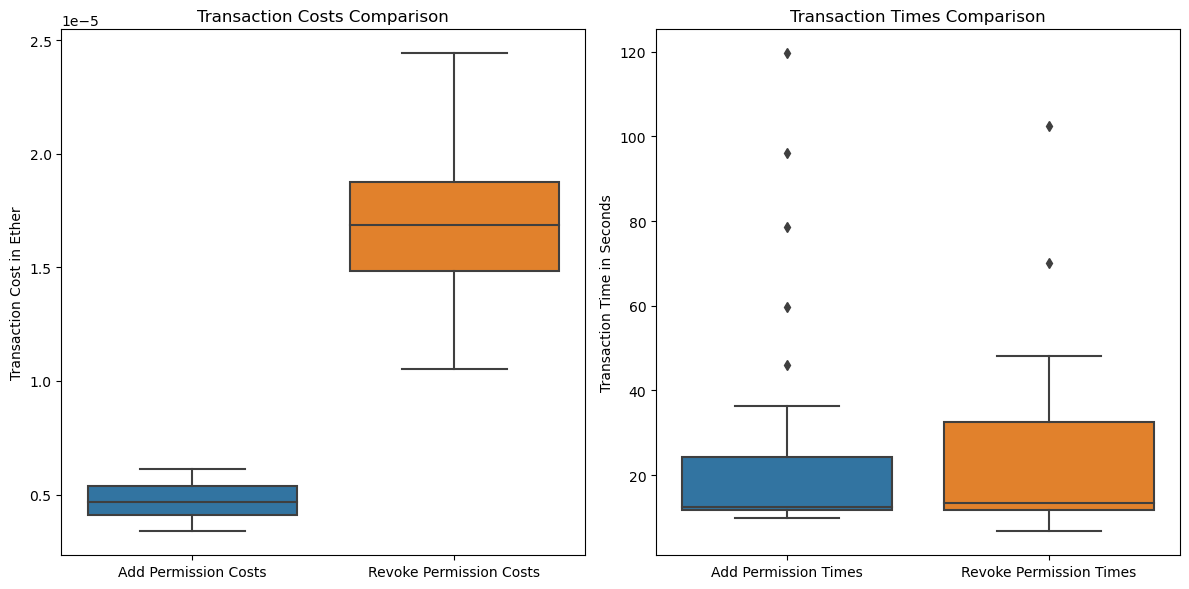

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for addPermission and revokePermission
# Replace these with your actual data
# Separate the data into costs and times for each list
add_costs, add_times = zip(*addPermission)
revoke_costs, revoke_times = zip(*revokePermission)

# Create boxplots
plt.figure(figsize=(12, 6))

# Boxplot for transaction costs
plt.subplot(1, 2, 1)
sns.boxplot(data=[add_costs, revoke_costs])
plt.xticks([0, 1], ['Add Permission Costs', 'Revoke Permission Costs'])
plt.ylabel('Transaction Cost in Ether')
plt.title('Transaction Costs Comparison')

# Boxplot for transaction times
plt.subplot(1, 2, 2)
sns.boxplot(data=[add_times, revoke_times])
plt.xticks([0, 1], ['Add Permission Times', 'Revoke Permission Times'])
plt.ylabel('Transaction Time in Seconds')
plt.title('Transaction Times Comparison')

plt.tight_layout()
plt.show()
